In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
# tuple unpacking, requires interweb
(x_train,y_train),(x_test,y_test) = mnist.load_data()

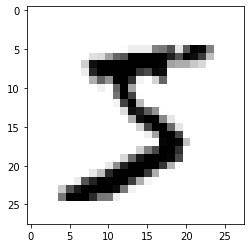

In [3]:
# '_r' flips image view
plt.imshow(x_train[0],cmap='gray_r')

## Preprocessing the data
1. One hot encoding
2. Scaling the data
3. Reshape the data to be in standard form (N,H,W,C)

In [4]:
# Need to convert to one hot encoding, else network thinks this is a regression problem
y_train.shape

(60000,)

In [5]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)
y_cat_train.shape

(60000, 10)

In [6]:
scaled_x_train = x_train/x_train.max()
scaled_x_test = x_test/x_test.max()
print(scaled_x_train.min(),scaled_x_train.max())


0.0 1.0


In [7]:
print(scaled_x_train.shape)
scaled_x_train = scaled_x_train.reshape(60000,28,28,1)
scaled_x_test = scaled_x_test.reshape(10000,28,28,1)
print(scaled_x_test.shape)


(60000, 28, 28)
(10000, 28, 28, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [9]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 2d to 1D
model.add(Flatten())
# modifiable
model.add(Dense(128,activation='relu'))
# max 10 outputs
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

2021-12-31 16:07:15.252630: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(scaled_x_train,y_cat_train,epochs=2)

2021-12-31 16:07:17.411886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-31 16:07:17.413003: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 54000000 Hz


Epoch 1/2
